In [1]:
from datasets import load_dataset
from transformers import LLaMATokenizer


tokenizer = LLaMATokenizer.from_pretrained("decapoda-research/llama-7b-hf", add_eos_token=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files="alpaca_data.json")


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    if data_point["instruction"]:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Input:
{data_point["input"]}

### Response:
{data_point["output"]}"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:
{data_point["output"]}"""


data = data.map(lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))})

/home/eric/miniconda3/envs/dl3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset json (/home/eric/.cache/huggingface/datasets/json/default-789f51900889f651/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)
100%|██████████| 1/1 [00:00<00:00, 703.62it/s]
Loading cached processed dataset at /home/eric/.cache/huggingface/datasets/json/default-789f51900889f651/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51/cache-0d61d5bdc68bbe36.arrow


(array([4.2516e+04, 8.2500e+03, 9.8300e+02, 1.9100e+02, 3.5000e+01,
        1.6000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  60. ,  184.5,  309. ,  433.5,  558. ,  682.5,  807. ,  931.5,
        1056. , 1180.5, 1305. ]),
 <BarContainer object of 10 artists>)

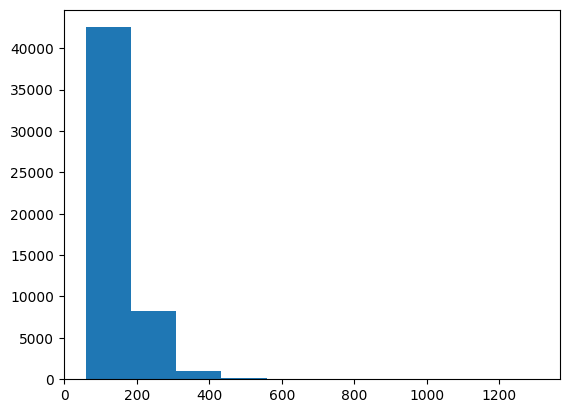

In [2]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens)

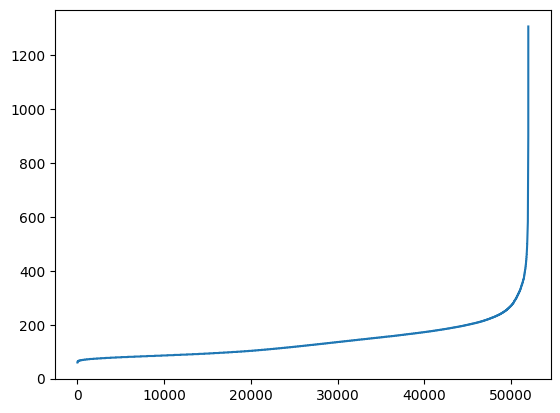

In [3]:
plt.plot(sorted(lens))

In [4]:
len([l for l in lens if l < 256])

49513